Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, QuantileRegressor, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_classif

import warnings
warnings.filterwarnings("ignore")


# Funcio per a llegir dades en format csv

url = 'https://raw.githubusercontent.com/AlbertRoca29/Datasets/main/datasets/mushrooms.csv'

def load_dataset(path):
    dataset = pd.read_csv(url, header=0, delimiter=',')
    return dataset

dataset = load_dataset(url)

print('\nNombre de nans per atribut\n\n',dataset.isnull().sum())

# Veure els possibles valors que pren cada variable

print('\n\nValors que pot pendre cada variable\n',
      'Nom','\t'*5,'Possibles valors','\t'*5,'h',
      '-'*70)
# _=[print('%-27s\t%-50s \t %d'%(col,dataset[col].unique(),len(dataset[col].unique()))) for col in dataset]



Nombre de nans per atribut

 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Valors que pot pendre cada variable
 Nom 					 Possibles valors 					 h ----------------------------------------------------------------------


Primera visualització del dataset per coneixer les variables i decidir que fer.


| Name | Variables que pot pendre|
|-:|:-|
cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s
cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises| bruises=t,no=f
odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment| attached=a,descending=d,free=f,notched=n
gill-spacing| close=c,crowded=w,distant=d
gill-size| broad=b,narrow=n
gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape| enlarging=e,tapering=t
stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type| partial=p,universal=u
veil-color| brown=n,orange=o,white=w,yellow=y
ring-number| none=n,one=o,two=t
ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 
class| edible=e, poisonous=p

In [ ]:
pd.set_option('display.max_columns', None)
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


El que veiem més pràctic fer, és crear un classifier , que identifiqui els bolets verinosos, per tant, la variable a predir és "class"

In [ ]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Montar la base de dades

Al dataset.describe() hem pogut veure que el nombre de unique values és menor al que en teoria pot pendre (segons la web).
Per exemple, la columna veil-type només té un possible valor i per tant, no ens serveix.

In [ ]:
_=[print('%-30s %-50s \t %d'%(col,dataset[col].unique(),len(dataset[col].unique()))) for col in dataset]

class                          ['p' 'e']                                          	 2
cap-shape                      ['x' 'b' 's' 'f' 'k' 'c']                          	 6
cap-surface                    ['s' 'y' 'f' 'g']                                  	 4
cap-color                      ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']          	 10
bruises                        ['t' 'f']                                          	 2
odor                           ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']              	 9
gill-attachment                ['f' 'a']                                          	 2
gill-spacing                   ['c' 'w']                                          	 2
gill-size                      ['n' 'b']                                          	 2
gill-color                     ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']  	 12
stalk-shape                    ['e' 't']                                          	 2
stalk-root                     ['e' 'c' 'b' 'r' '?']

La variable veil-type la borrem, la variable a predir class: Poisonous  = 1 , Eatable = 0

In [ ]:
X = dataset.drop(['class','veil-type'],axis=1)
y = dataset['class'] == 'p' # class: Poisonous  = 1 , Eatable = 0 

Ara converteixo, totes les columnes en dummies, no utilitzo el mínim nombre de dummies (que seria amb el drop_first activat) ja que penso que és més visual d'aquesta manera. Tot i que no aconsegueixi cap millora significativa.



In [ ]:
X_dummy = pd.get_dummies(X,columns=X.columns) #drop_first=True)
X_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

mm = make_pipeline(StandardScaler(), MinMaxScaler())

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,matriu=False,report=False):
    print('%-50s Accuracy Score: %.4f\n' % (classifier,accuracy_score(y_test,classifier.predict(X_test))))
    if(report): print('Classification Report:\n{}'.format(classification_report(y_test,classifier.predict(X_test))))
    if(matriu): print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

Veiem si les diferents classes estan balancejades.

In [ ]:
print(sum(y)/y.shape[0])

0.48202855736090594


Un 48.2% del bolets del dataset són verinosos. No caldrà utilitzar cap estrategia per balancejar el dataset

# Classifier amb moltes variables.

In [ ]:
models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]


for classifier in models:  
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 1.0000

Confusion Matrix:
[[1244    0]
 [   0 1194]]

SVC()                                              Accuracy Score: 1.0000

Confusion Matrix:
[[1244    0]
 [   0 1194]]

LinearSVC()                                        Accuracy Score: 1.0000

Confusion Matrix:
[[1244    0]
 [   0 1194]]

Perceptron()                                       Accuracy Score: 0.9996

Confusion Matrix:
[[1244    0]
 [   1 1193]]

SGDClassifier()                                    Accuracy Score: 1.0000

Confusion Matrix:
[[1244    0]
 [   0 1194]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9996

Confusion Matrix:
[[1244    0]
 [   1 1193]]

KNeighborsClassifier()                             Accuracy Score: 1.0000

Confusion Matrix:
[[1244    0]
 [   0 1194]]

GaussianNB()                                       Accuracy Score: 0.9565

Confusion Matrix:
[[1139  105]
 [   1 1193]]

DecisionTreeClassifier(criterion

Nom 				 Accuracy	Falsos Comestibles 	Correlació
 --------------------------------------------------------------------------------
odor_n                           0.88925	0.00668			 -1
ring-type_p                      0.78097	0.03940			 -1
stalk-surface-above-ring_k       0.77605	0.08723			 1
odor_f                           0.77523	0.09638			 1
stalk-surface-below-ring_k       0.76046	0.09444			 1
gill-size_b                      0.75431	0.08706			 -1
gill-size_n                      0.75431	0.08706			 1


LogisticRegression             [0.88597 0.88597 0.88597 0.87777 0.94011 0.9799  0.9799  0.9799  0.9799  0.9799  0.9799  0.98031 0.97375 0.97375 0.97908 0.97662 0.97662 0.97662]
SVC                            [0.88597 0.88597 0.88597 0.90894 0.94011 0.9799  0.9799  0.9799  0.9799  0.98031 0.98031 0.99057 0.99549 0.99549 0.99959 0.99959 1.      1.     ]
LinearSVC                      [0.88597 0.88597 0.88597 0.87777 0.94011 0.9799  0.97457 0.97457 0.96349 0.97498 0.97498 0.97703 0.97375 0.97375 0.97375 0.97375 0.97375 0.97375]
Perceptron                     [0.53076 0.79655 0.86751 0.90894 0.93478 0.94135 0.95734 0.95734 0.94135 0.93601 0.96021 0.9274  0.97375 0.95119 0.95529 0.97375 0.95406 0.96021]
SGDClassifier                  [0.88597 0.88597 0.88597 0.88597 0.93478 0.9799  0.9799  0.9799  0.9799  0.9799  0.9799  0.9799  0.97375 0.98482 0.98482 0.98482 0.98236 0.98482]
LinearDiscriminantAnalysis     [0.88597 0.88597 0.88597 0.88597 0.94011 0.97457 0.96965 0.96965 0.96965 0.96965 0.9

(0.825, 1.025)

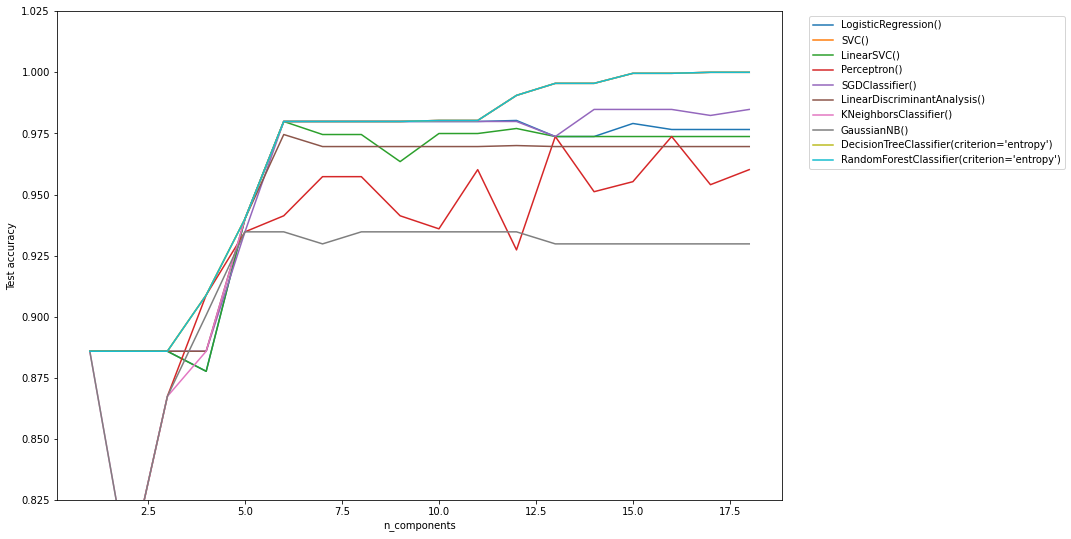

In [ ]:
plt.figure(figsize=(13,9))
def k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final):
    selector = [0] + [SelectKBest(score_func=chi2, k=i) for i in range(1,n_final+1)]
    acc =[]
    for i in range(1,n_final+1):
        X_train_r = selector[i].fit_transform(X_train,y_train)
        X_test_r = selector[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        acc.append(accuracy_score(y_test,classifier.predict(X_test_r)))
    plt.plot(range(1,n_final+1),acc,label = classifier)
    print(type(classifier).__name__.ljust(30, ' '),np.array(acc))


np.set_printoptions(precision=5, linewidth=np.inf)
for classifier in models:  
    k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,18)
np.set_printoptions(precision=None, linewidth= None)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.ylim([0.825, 1.025])

Es pot veure com tenim un molt bon primer component, i que amb 6 components trobem una accuracy superior al 97.5% en 9 dels 10 models.

Per 4 models, en concret els models:

    - SVC(kernel='rbf'),
    - KNeighborsClassifier(n_neighbors = 5),
    - DecisionTreeClassifier(criterion='entropy'),
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
veiem que segueix pujant l'accuracy de manera força constant i a les 14 o 15 iteracions, supera el 99% d'accuracy i abans de les 20 serà un model tan bo com si estiguessim treballant amb tota la base de dades.

Primer de tot , vull visualitzar els resultats amb el millor atribut.

In [ ]:
BK1 = SelectKBest(score_func=chi2,k=1)
BK1.fit(X_train,y_train)
s = BK1.get_support()

# Com és un sol atribut , amb un sol model en tenim prou.
LR = LogisticRegression()
LR.fit(X_train[:,s],y_train)
print_score(LR,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.8893

Confusion Matrix:
[[1012  232]
 [  38 1156]]



Em sembla super interessant que un sol atribut pugui predir tan bé si els bolets son verinosos o no, així que vull detectar de quina variable es tracta.

odor_n
[[-4.84156079]]


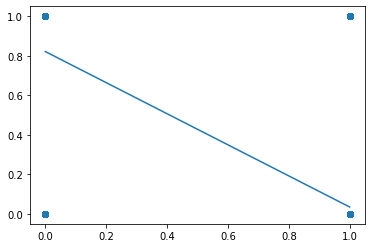

In [ ]:
index = np.where(s)[0]
print(X_dummy.columns[index][0])

y_values = LR.predict_proba(X_test[:,index])[:,1] 
plt.plot(X_test[:,index], y_values)
plt.scatter(X_test[:,index], y_test)
print(LR.coef_)

odor_n correspon als bolets que no fan olor. Per tant, els bolets que no fan olor són molt més propensos a ser verinosos. Si fan una olor peculiar, sembla que és més probable que siguin comestibles.

Ara , ja per curiositat, vull veure quins són els següents atributs que classifiquen millor per si sols. Penso que tot i computacionalment no ser molt interessant a la pràctica sembla lo més interessant, la gent busca un sol indicador per veure si són perillosos o no. A veure si surt algo més interessant.

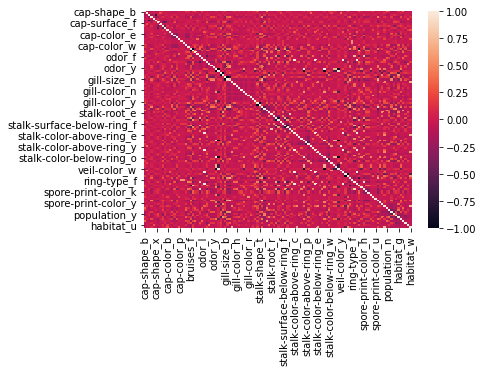

In [ ]:
c = X_dummy.corr()
sns.heatmap(c)

In [ ]:
LR = LogisticRegression()

D = {}
for i in range(X_train.shape[1]):
    LR.fit(X_train[:,i].reshape(-1, 1),y_train)
    D[X_dummy.columns[i]] = [accuracy_score(y_test,LR.predict(X_test[:,i].reshape(-1, 1))) , sum((LR.predict(X_test[:,i].reshape(-1, 1))!=y_test)[y_test])/X_train.shape[0] ,int(np.sign(LR.coef_))]

print("Nom \t\t\t\t Accuracy\tFalsos Comestibles \tSigne de la correlació\n","-"*90)
_=[print("%-32s %.5f\t%.5f\t\t\t %d"%(i,j[0],j[1],j[2])) for i,j in dict(sorted(D.items(), key=lambda item: item[1][0],reverse=True)).items() if j[0]>0.75]

Nom 				 Accuracy	Falsos Comestibles 	Signe de la correlació
 ------------------------------------------------------------------------------------------
odor_n                           0.88925	0.00510			 -1
odor_f                           0.78220	0.09339			 1
stalk-surface-above-ring_k       0.77892	0.08635			 1
stalk-surface-below-ring_k       0.76866	0.09268			 1
ring-type_p                      0.76456	0.04151			 -1
gill-size_b                      0.76415	0.08547			 -1
gill-size_n                      0.76415	0.08547			 1


Aquí veiem els resultats utilitzant 6 atributs

In [ ]:
m = SelectKBest(score_func=chi2,k=6)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.9799

Confusion Matrix:
[[1267   27]
 [  22 1122]]

SVC()                                              Accuracy Score: 0.9799

Confusion Matrix:
[[1267   27]
 [  22 1122]]

LinearSVC()                                        Accuracy Score: 0.9799

Confusion Matrix:
[[1267   27]
 [  22 1122]]

Perceptron()                                       Accuracy Score: 0.9413

Confusion Matrix:
[[1294    0]
 [ 143 1001]]

SGDClassifier()                                    Accuracy Score: 0.9799

Confusion Matrix:
[[1267   27]
 [  22 1122]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9746

Confusion Matrix:
[[1267   27]
 [  35 1109]]

KNeighborsClassifier()                             Accuracy Score: 0.9799

Confusion Matrix:
[[1267   27]
 [  22 1122]]

GaussianNB()                                       Accuracy Score: 0.9348

Confusion Matrix:
[[1294    0]
 [ 159  985]]

DecisionTreeClassifier(criterion

Aquí veiem el resultat amb 18 atributs

In [ ]:
m = SelectKBest(score_func=chi2,k=18)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.9766

Confusion Matrix:
[[1279   15]
 [  42 1102]]

SVC()                                              Accuracy Score: 1.0000

Confusion Matrix:
[[1294    0]
 [   0 1144]]

LinearSVC()                                        Accuracy Score: 0.9737

Confusion Matrix:
[[1279   15]
 [  49 1095]]

Perceptron()                                       Accuracy Score: 0.9602

Confusion Matrix:
[[1249   45]
 [  52 1092]]

SGDClassifier()                                    Accuracy Score: 0.9803

Confusion Matrix:
[[1267   27]
 [  21 1123]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9696

Confusion Matrix:
[[1255   39]
 [  35 1109]]

KNeighborsClassifier()                             Accuracy Score: 1.0000

Confusion Matrix:
[[1294    0]
 [   0 1144]]

GaussianNB()                                       Accuracy Score: 0.9299

Confusion Matrix:
[[1282   12]
 [ 159  985]]

DecisionTreeClassifier(criterion

Es pot veure que tots van genial i que triguen poc, així que l'objectiu de la pràctica passara a ser aconseguir reduir l'espai més que trobar un bon model , ja que un bon model és fàcil de aconseguir.

# PCA
Anteriorment , he pogut veure que agafant 6 atributs puc aconseguir un bon model, i agafant-ne 18 un exelent model.

Però ara vull veure si agafant només 2 o 3 utilitzant un PCA es pot aconseguir un model tan bó com els anteriors.

L'objectiu és saber a quin nombre de components he de reduir l'espai, per aconseguir una bona accuracy, si amb 2 o 3 són suficients es podrà fer un plot per visualitzar-ho.

Per això creare diferents subsets. Les variables que trio per a cada un són aconseguides a partir d'un PCA per a cada nombre de variables.

In [ ]:
def pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final):
    pca = [0,0]+[PCA(n_components=i) for i in range(2,n_final+1)]
    acc =[]
    for i in range(2,n_final+1):
        X_train_r = pca[i].fit_transform(X_train)
        X_test_r = pca[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        acc.append(accuracy_score(y_test,classifier.predict(X_test_r)))
    print(type(classifier).__name__.ljust(30, ' '),np.array(acc))
    plt.plot(range(2,n_final+1),acc,label = classifier)
    

LogisticRegression             [0.88433 0.88351 0.85603 0.96555 0.9639  0.96801 0.96349 0.96267 0.96514]
SVC                            [0.92699 0.96103 0.97539 0.99262 0.99385 0.9959  0.99795 0.99877 0.99918]
LinearSVC                      [0.8872  0.89377 0.87408 0.96349 0.96103 0.96432 0.96267 0.96267 0.9639 ]
Perceptron                     [0.8872  0.73011 0.89336 0.95406 0.92166 0.95324 0.94586 0.93068 0.94791]
SGDClassifier                  [0.8872  0.90197 0.88802 0.96267 0.95406 0.9717  0.96637 0.96267 0.96678]
LinearDiscriminantAnalysis     [0.8872  0.89377 0.88146 0.94053 0.94627 0.96267 0.95939 0.95816 0.95775]
KNeighborsClassifier           [0.96062 0.99057 0.9959  0.99795 1.      1.      1.      1.      1.     ]
GaussianNB                     [0.8913  0.89377 0.89705 0.89951 0.90238 0.90525 0.91386 0.93437 0.9356 ]
DecisionTreeClassifier         [0.9598  0.98811 0.99385 0.99631 0.99795 0.99672 0.99877 0.99795 0.99795]
RandomForestClassifier         [0.96801 0.99303 0.99672

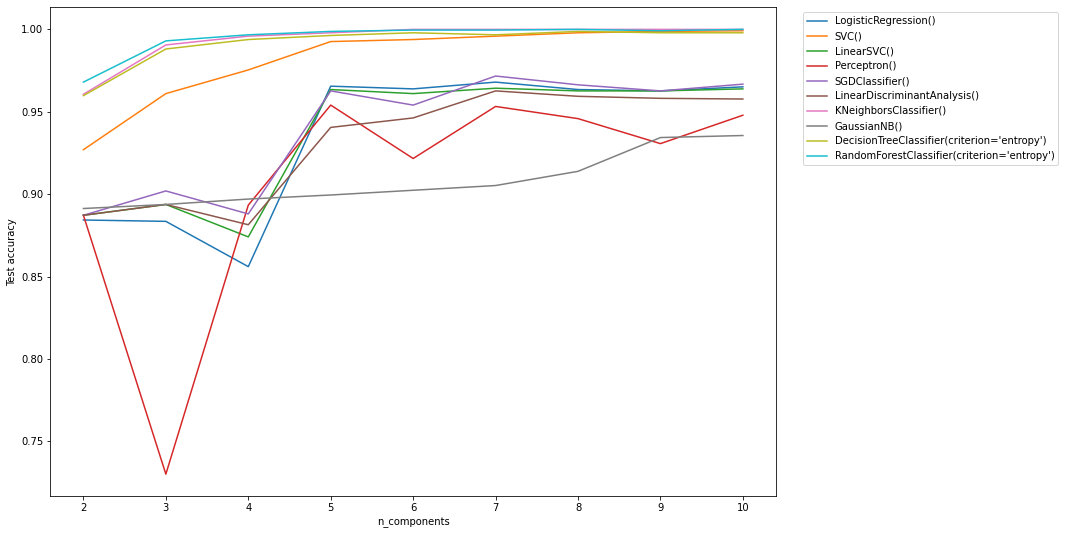

In [ ]:
plt.figure(figsize=(13,9))
models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 10)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


En aquest cas veiem 3 models que destaquen clarament sobre la resta:

    - KNeighborsClassifier(n_neighbors = 5)
    - DecisionTreeClassifier(criterion='entropy')
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

Aquests models aconsegueixen una accuracy superior al 95% amb un PCA de dimensio 2, i un 99% amb un de dimensio 3.

Visualització gràfica dels PCA.

In [ ]:
# X=pd.get_dummies(X,columns=X.columns) # ,drop_first=True)
# X.head()
# X.shape

# from sklearn.preprocessing import LabelEncoder
# Encoder_X = LabelEncoder() 
# for col in X.columns:

#     X[col] = Encoder_X.fit_transform(X[col])
#     # df['col1_num'] = df['col1'].apply(lambda x: ['first', 'second', 'third', 'fourth'].index(x))
# Encoder_y=LabelEncoder()
# y = Encoder_y.fit_transform(y)

# X.head()

i=8
n = len(X[X.columns[i]].unique())
j = 0
M = np.array(X[X.columns[i]].value_counts().reset_index())
while(j<n):
    if(M[j,1]/X.shape[0]<0.05):
        print(M[j,1]/X.shape[0])
    X = 
    # print(X.columns[i]+'_'+M[j,0]+' = ') #,X[X.columns[i]]==M[j,1])
    j+=1
    

# print(np.array(X[X.columns[8]].value_counts().reset_index()))

SyntaxError: ignored

In [ ]:
X.mode()

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X)[:,:10], y, test_size=0.9, random_state=42)
sc = preprocessing.StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

print_score(classifier,X_train,y_train,X_test,y_test)